<div align="center" style="color:blue;">

# Smart Watch Data Analysis

</div>


# Objective and Scope

## Objective
The goal of this project is to analyze smartwatch data to predict activity types and calories burned using various machine learning models. The specific objectives are:
To understand the relationship between different features (steps, distance, heart rate, etc.) and the target variables (activity type and calories burned).
To develop and evaluate machine learning models to accurately predict activity types and calories burned.
To provide actionable insights and recommendations based on the analysis.

## Scope
The scope of the analysis includes:

Exploratory Data Analysis (EDA) to understand the data distribution, detect any anomalies, and explore relationships between features.
Preprocessing steps such as handling missing values, encoding categorical variables, and feature scaling.
Development of machine learning models, including Random Forest Classifier for activity type prediction and Stacking Regressor for calorie prediction.
Evaluation of model performance using appropriate metrics.
Generation of insights and recommendations based on the analysis results.

### Step 1: Import Libraries
First, we import the necessary libraries for data manipulation, analysis, and model building.

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.datasets import fetch_california_housing
import lightgbm as lgb
from sklearn.compose import ColumnTransformer
import warnings
import joblib

Explanation: These libraries are essential for handling data (Pandas, NumPy), creating visualizations (Matplotlib, Seaborn), and building and evaluating machine learning models (Scikit-learn).

### Step 2: Load Data
Next, we load the dataset into a Pandas DataFrame.

In [139]:
data = pd.read_csv('smartwatch.csv')
data.head()

Unnamed: 0  X1  age  gender  height  weight      steps  hear_rate  \
0           1   1   20       1   168.0    65.4  10.771429  78.531302   
1           2   2   20       1   168.0    65.4  11.475325  78.453390   
2           3   3   20       1   168.0    65.4  12.179221  78.540825   
3           4   4   20       1   168.0    65.4  12.883117  78.628260   
4           5   5   20       1   168.0    65.4  13.587013  78.715695   

    calories  distance  entropy_heart  entropy_setps  resting_heart  \
0   0.344533  0.008327       6.221612       6.116349           59.0   
1   3.287625  0.008896       6.221612       6.116349           59.0   
2   9.484000  0.009466       6.221612       6.116349           59.0   
3  10.154556  0.010035       6.221612       6.116349           59.0   
4  10.825111  0.010605       6.221612       6.116349           59.0   

   corr_heart_steps  norm_heart  intensity_karvonen  sd_norm_heart  \
0          1.000000   19.531302            0.138520       1.000000   
1          1.000000   19.453390            0.137967       1.000000   
2          1.000000   19.540825            0.138587       1.000000   
3          1.000000   19.628260            0.139208       1.000000   
4          0.982816   19.715695            0.139828       0.241567   

   steps_times_distance       device activity  
0              0.089692  apple watch    Lying  
1              0.102088  apple watch    Lying  
2              0.115287  apple watch    Lying  
3              0.129286  apple watch    Lying  
4              0.144088  apple watch    Lying

Explanation: Loading the data allows us to inspect the first few rows and understand its structure and contents.

# Methodology

## Data Preprocessing

### Data Cleaning: Removed leading/trailing whitespace from column names and handled missing values using forward fill.

We clean the data by handling missing values and encoding categorical variables.

#### 3.1 Inspect the Dataset: Check for missing values, duplicates, and understand the distribution of each column.

In [140]:
print("\nMissing values in each column:")
print(data.isnull().sum())


Missing values in each column:
Unnamed: 0              0
X1                      0
age                     0
gender                  0
height                  0
weight                  0
steps                   0
hear_rate               0
calories                0
distance                0
entropy_heart           0
entropy_setps           0
resting_heart           0
corr_heart_steps        0
norm_heart              0
intensity_karvonen      0
sd_norm_heart           0
steps_times_distance    0
device                  0
activity                0
dtype: int64


Explanation: Identifying missing values helps us understand which columns need imputation or removal.

In [141]:
print("\nNumber of duplicate rows:")
print(data.duplicated().sum())

data = data.drop_duplicates()


Number of duplicate rows:
0


Explanation: Removing duplicates ensures the data is clean and each observation is unique.

In [142]:
print("\nBasic statistics for each column:")
print(data.describe())


Basic statistics for each column:
        Unnamed: 0           X1          age       gender       height  \
count  6264.000000  6264.000000  6264.000000  6264.000000  6264.000000   
mean   3132.500000  1771.144317    29.158525     0.476533   169.709052   
std    1808.405375  1097.988748     8.908978     0.499489    10.324698   
min       1.000000     1.000000    18.000000     0.000000   143.000000   
25%    1566.750000   789.750000    23.000000     0.000000   160.000000   
50%    3132.500000  1720.000000    28.000000     0.000000   168.000000   
75%    4698.250000  2759.250000    33.000000     1.000000   180.000000   
max    6264.000000  3670.000000    56.000000     1.000000   191.000000   

            weight        steps    hear_rate     calories     distance  \
count  6264.000000  6264.000000  6264.000000  6264.000000  6264.000000   
mean     69.614464   109.562268    86.142331    19.471823    13.832555   
std      13.451878   222.797908    28.648385    27.309765    45.941437   
mi

Explanation: Descriptive statistics provide a summary of the data, including measures such as mean, median, and standard deviation.


Distribution of each column:


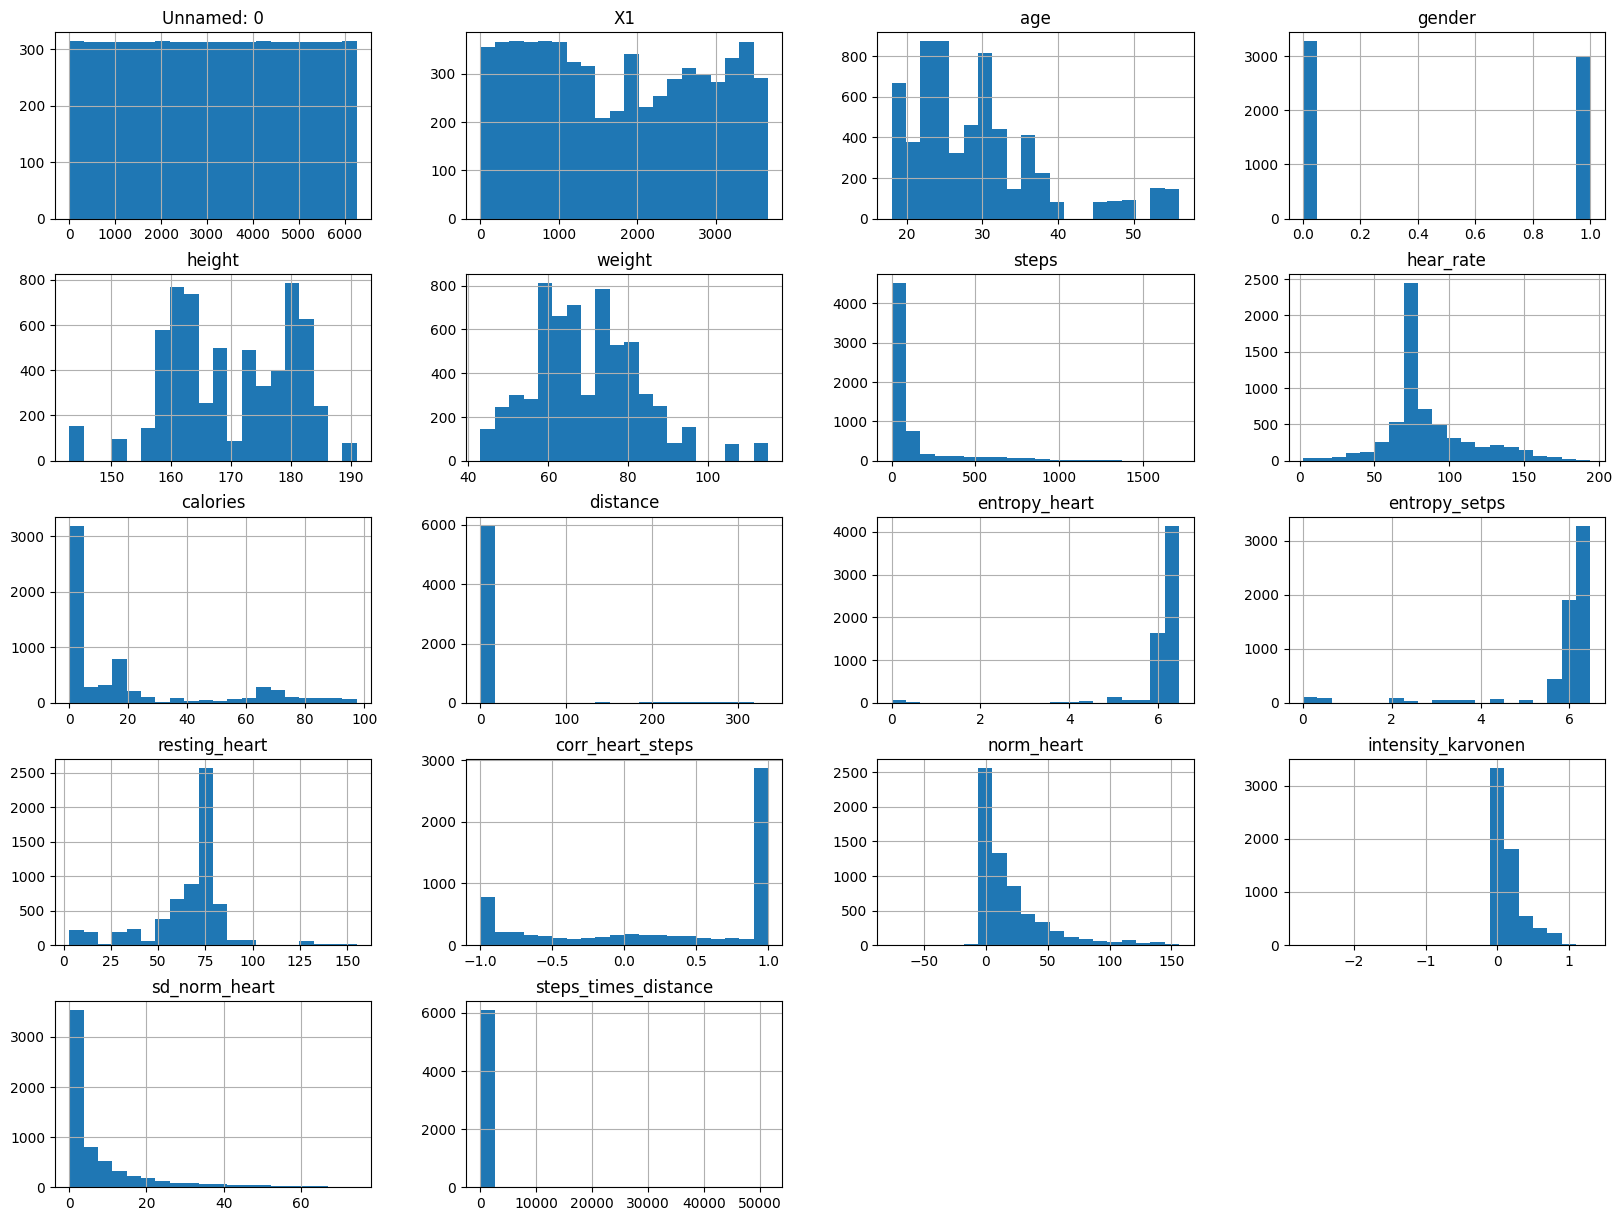

In [143]:
print("\nDistribution of each column:")
data.hist(bins=20, figsize=(20, 15))
plt.show()

Explanation: Histograms help visualize the distribution and identify any skewness or outliers in the data.


Pairplot to visualize relationships and distributions:


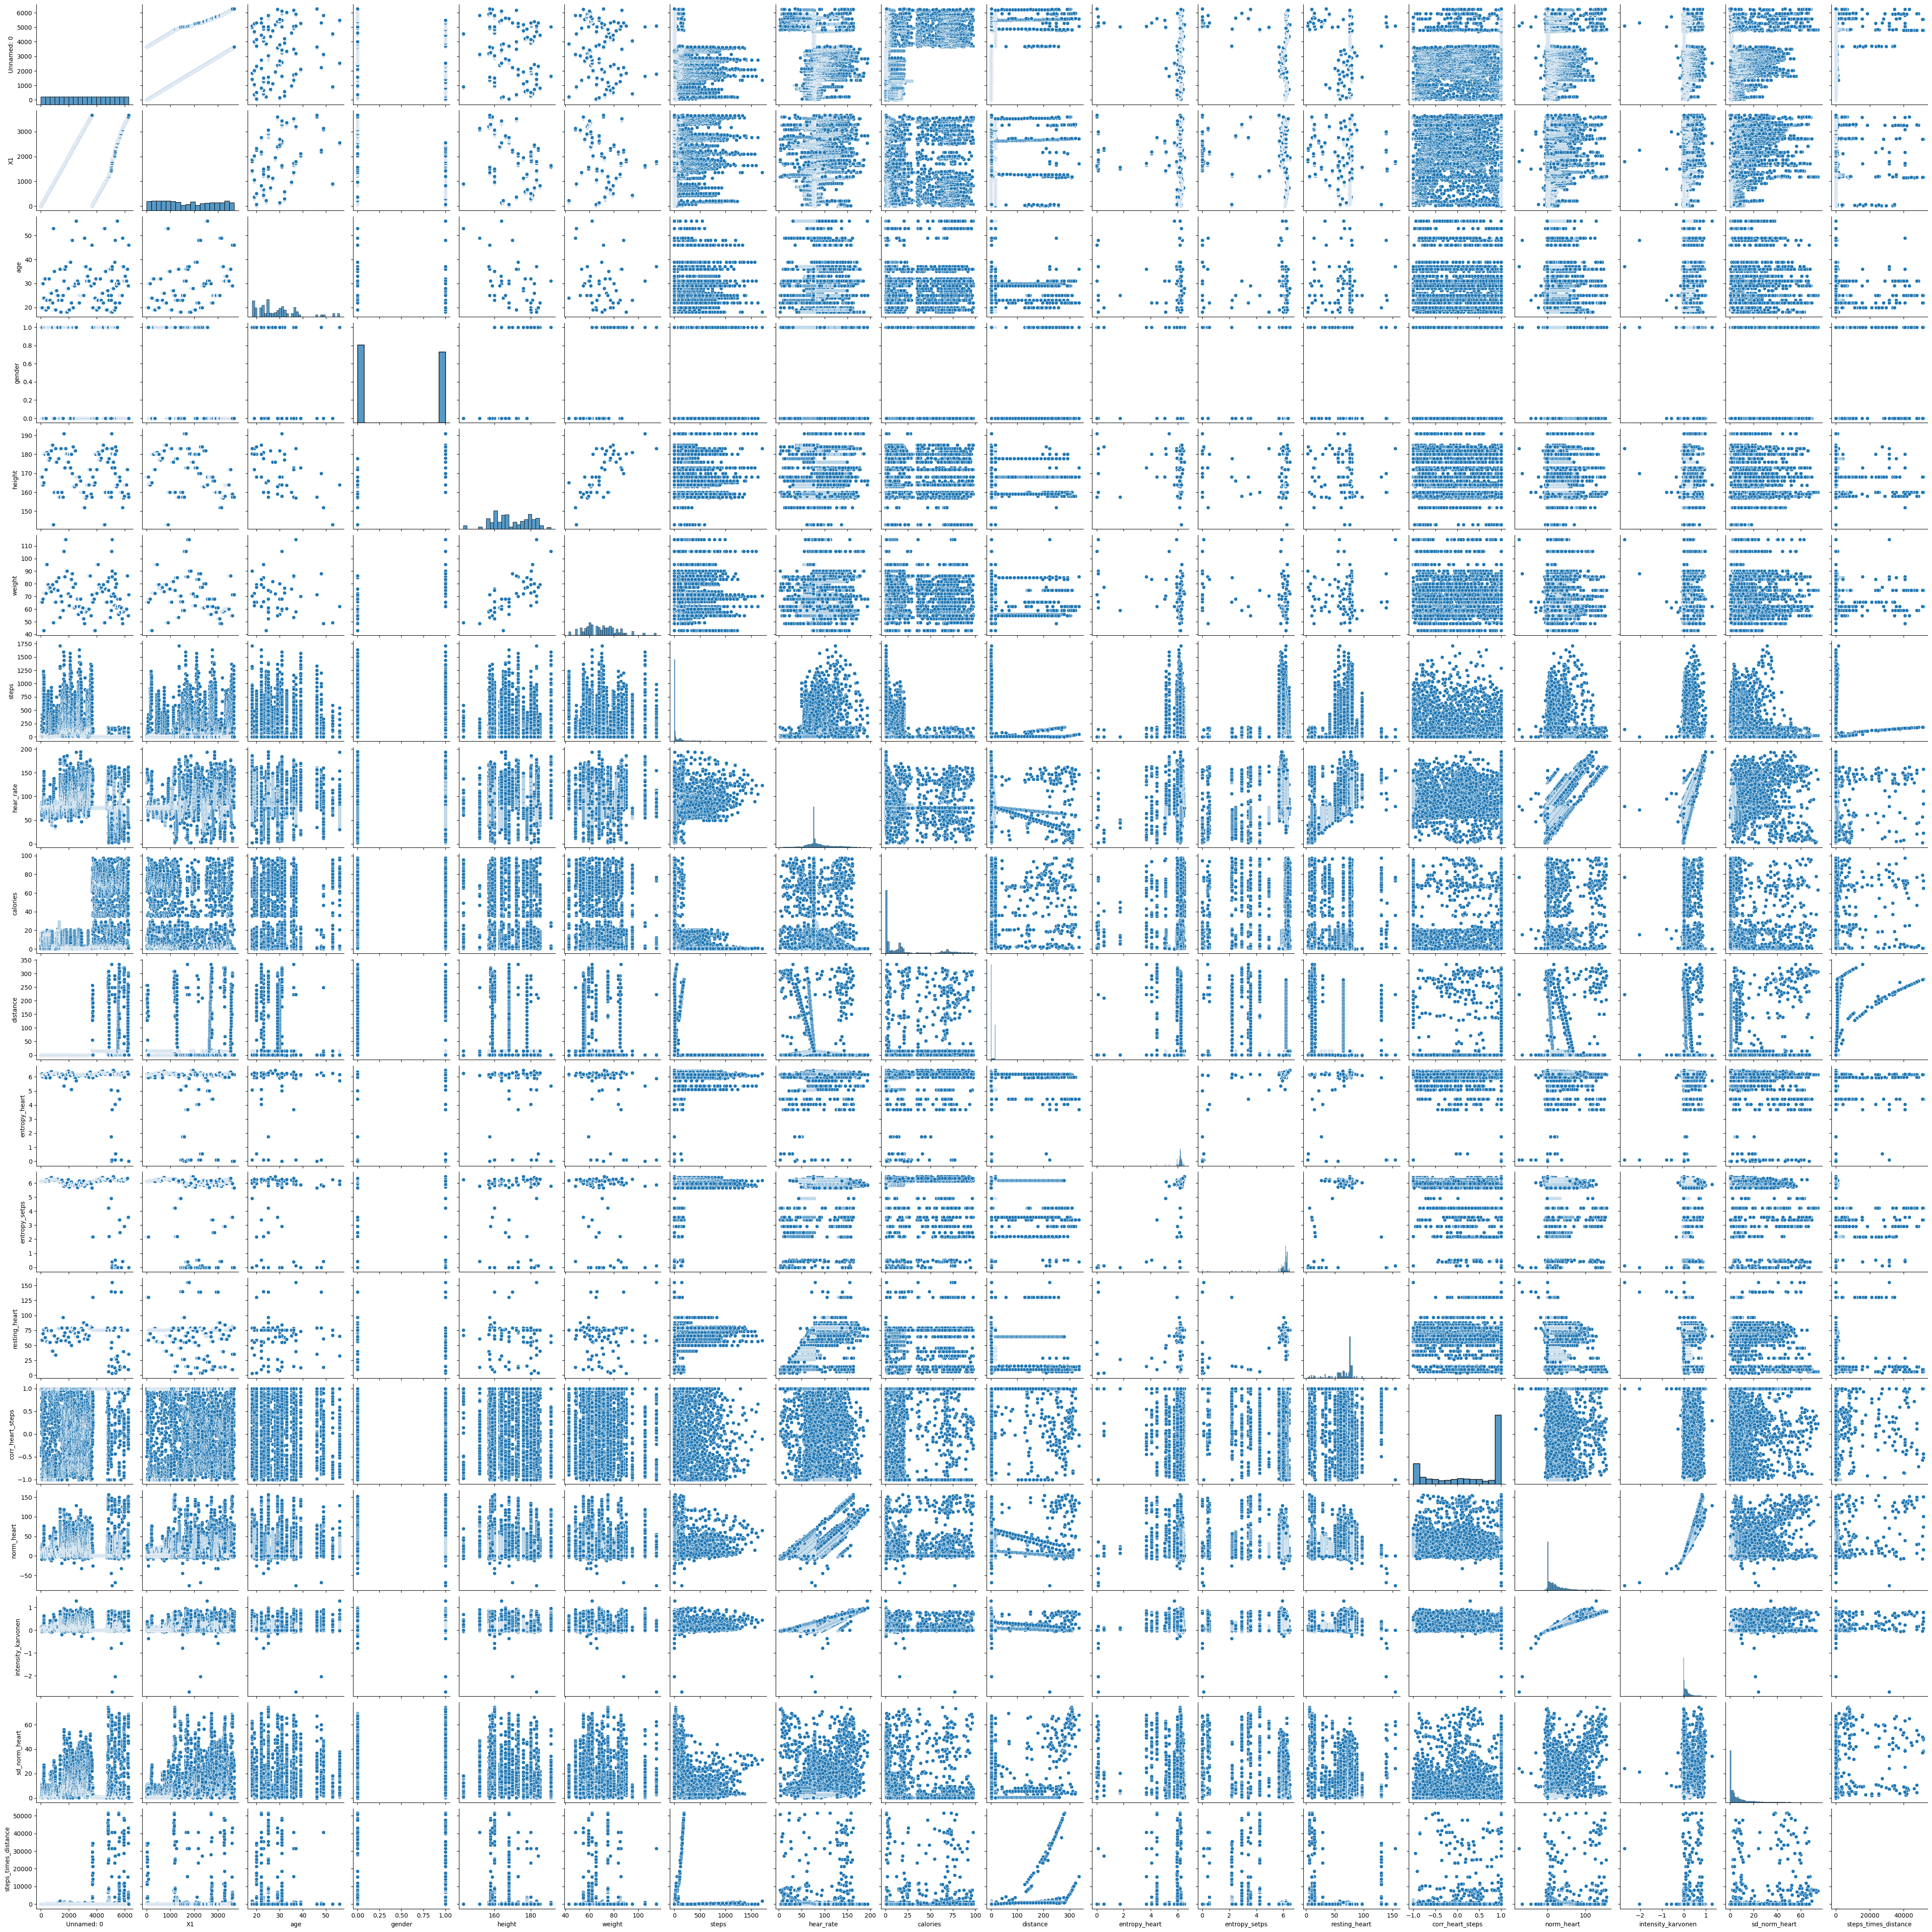

In [144]:
print("\nPairplot to visualize relationships and distributions:")
sns.pairplot(data)
plt.show()

Explanation: Pairplot helps visualize the pairwise relationships and distributions between different columns.

#### 3.2 Handle Missing Values: Decide how to address missing values based on data context (e.g.,drop rows, use median/mean for filling).

In [145]:
print("\nMissing values in each column:")
print(data.isnull().sum())


Missing values in each column:
Unnamed: 0              0
X1                      0
age                     0
gender                  0
height                  0
weight                  0
steps                   0
hear_rate               0
calories                0
distance                0
entropy_heart           0
entropy_setps           0
resting_heart           0
corr_heart_steps        0
norm_heart              0
intensity_karvonen      0
sd_norm_heart           0
steps_times_distance    0
device                  0
activity                0
dtype: int64


Explanation: Identifying missing values helps us understand which columns need imputation or removal.

In [146]:
data_dropped = data.dropna()
print("\nDataset after dropping rows with missing values:")
print(data_dropped.head())


Dataset after dropping rows with missing values:
   Unnamed: 0  X1  age  gender  height  weight      steps  hear_rate  \
0           1   1   20       1   168.0    65.4  10.771429  78.531302   
1           2   2   20       1   168.0    65.4  11.475325  78.453390   
2           3   3   20       1   168.0    65.4  12.179221  78.540825   
3           4   4   20       1   168.0    65.4  12.883117  78.628260   
4           5   5   20       1   168.0    65.4  13.587013  78.715695   

    calories  distance  entropy_heart  entropy_setps  resting_heart  \
0   0.344533  0.008327       6.221612       6.116349           59.0   
1   3.287625  0.008896       6.221612       6.116349           59.0   
2   9.484000  0.009466       6.221612       6.116349           59.0   
3  10.154556  0.010035       6.221612       6.116349           59.0   
4  10.825111  0.010605       6.221612       6.116349           59.0   

   corr_heart_steps  norm_heart  intensity_karvonen  sd_norm_heart  \
0          1.000000 

Explanation: Dropping rows with missing values can be a simple strategy, but it may lead to loss of important data if many rows have missing values.

In [147]:
data_filled_median = data.copy()
numeric_columns = data.select_dtypes(include=['number']).columns
data_filled_median[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

print("Dataset after filling missing values with median for numeric columns:")
print(data_filled_median.head())

print("\nMissing values in each column after handling missing values:")
print(data_filled_median.isnull().sum())

Dataset after filling missing values with median for numeric columns:
   Unnamed: 0  X1  age  gender  height  weight      steps  hear_rate  \
0           1   1   20       1   168.0    65.4  10.771429  78.531302   
1           2   2   20       1   168.0    65.4  11.475325  78.453390   
2           3   3   20       1   168.0    65.4  12.179221  78.540825   
3           4   4   20       1   168.0    65.4  12.883117  78.628260   
4           5   5   20       1   168.0    65.4  13.587013  78.715695   

    calories  distance  entropy_heart  entropy_setps  resting_heart  \
0   0.344533  0.008327       6.221612       6.116349           59.0   
1   3.287625  0.008896       6.221612       6.116349           59.0   
2   9.484000  0.009466       6.221612       6.116349           59.0   
3  10.154556  0.010035       6.221612       6.116349           59.0   
4  10.825111  0.010605       6.221612       6.116349           59.0   

   corr_heart_steps  norm_heart  intensity_karvonen  sd_norm_heart  \


Explanation: Filling missing values with the median is useful because it is less affected by outliers compared to the mean.

In [148]:
data_filled_mean = data.copy()
numeric_columns = data.select_dtypes(include=['number']).columns
data_filled_mean[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

print("Dataset after filling missing values with mean for numeric columns:")
print(data_filled_mean.head())

print("\nMissing values in each column after handling missing values:")
print(data_filled_mean.isnull().sum())

Dataset after filling missing values with mean for numeric columns:
   Unnamed: 0  X1  age  gender  height  weight      steps  hear_rate  \
0           1   1   20       1   168.0    65.4  10.771429  78.531302   
1           2   2   20       1   168.0    65.4  11.475325  78.453390   
2           3   3   20       1   168.0    65.4  12.179221  78.540825   
3           4   4   20       1   168.0    65.4  12.883117  78.628260   
4           5   5   20       1   168.0    65.4  13.587013  78.715695   

    calories  distance  entropy_heart  entropy_setps  resting_heart  \
0   0.344533  0.008327       6.221612       6.116349           59.0   
1   3.287625  0.008896       6.221612       6.116349           59.0   
2   9.484000  0.009466       6.221612       6.116349           59.0   
3  10.154556  0.010035       6.221612       6.116349           59.0   
4  10.825111  0.010605       6.221612       6.116349           59.0   

   corr_heart_steps  norm_heart  intensity_karvonen  sd_norm_heart  \
0 

Explanation: Filling missing values with the mean is a common strategy, but it can be influenced by outliers in the data.

In [149]:
specific_value = 0
data_filled_value = data.fillna(specific_value)
print("\nDataset after filling missing values with a specific value:")
print(data_filled_value.head())


Dataset after filling missing values with a specific value:
   Unnamed: 0  X1  age  gender  height  weight      steps  hear_rate  \
0           1   1   20       1   168.0    65.4  10.771429  78.531302   
1           2   2   20       1   168.0    65.4  11.475325  78.453390   
2           3   3   20       1   168.0    65.4  12.179221  78.540825   
3           4   4   20       1   168.0    65.4  12.883117  78.628260   
4           5   5   20       1   168.0    65.4  13.587013  78.715695   

    calories  distance  entropy_heart  entropy_setps  resting_heart  \
0   0.344533  0.008327       6.221612       6.116349           59.0   
1   3.287625  0.008896       6.221612       6.116349           59.0   
2   9.484000  0.009466       6.221612       6.116349           59.0   
3  10.154556  0.010035       6.221612       6.116349           59.0   
4  10.825111  0.010605       6.221612       6.116349           59.0   

   corr_heart_steps  norm_heart  intensity_karvonen  sd_norm_heart  \
0        

Explanation: Filling missing values with a specific value(e.g,0) can be useful when you want to indicate the absence of data explicitly.

In [150]:
data.columns = data.columns.str.strip()

Explanation: Cleaning column names ensures consistency and avoids issues during data manipulation.

In [151]:
print("\nMissing values in each column after handling missing values:")
print(data.isnull().sum())


Missing values in each column after handling missing values:
Unnamed: 0              0
X1                      0
age                     0
gender                  0
height                  0
weight                  0
steps                   0
hear_rate               0
calories                0
distance                0
entropy_heart           0
entropy_setps           0
resting_heart           0
corr_heart_steps        0
norm_heart              0
intensity_karvonen      0
sd_norm_heart           0
steps_times_distance    0
device                  0
activity                0
dtype: int64


Explanation: This step helps us verify that the missing values have been effectively handled.

### Encoding Categorical Variables: Applied one-hot encoding to categorical features and label encoding to the target variable 'activity'.

#### 3.3 Data Transformation: Convert categorical variables (like gender) to numeric if needed and normalize numerical data for consistent analysis.

In [152]:
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   Unnamed: 0  X1  age  gender  height  weight      steps  hear_rate  \
0           1   1   20       1   168.0    65.4  10.771429  78.531302   
1           2   2   20       1   168.0    65.4  11.475325  78.453390   
2           3   3   20       1   168.0    65.4  12.179221  78.540825   
3           4   4   20       1   168.0    65.4  12.883117  78.628260   
4           5   5   20       1   168.0    65.4  13.587013  78.715695   

    calories  distance  entropy_heart  entropy_setps  resting_heart  \
0   0.344533  0.008327       6.221612       6.116349           59.0   
1   3.287625  0.008896       6.221612       6.116349           59.0   
2   9.484000  0.009466       6.221612       6.116349           59.0   
3  10.154556  0.010035       6.221612       6.116349           59.0   
4  10.825111  0.010605       6.221612       6.116349           59.0   

   corr_heart_steps  norm_heart  intensity_karvonen  sd_norm_heart  \
0          1.000000   19.531302        

Explanation: Inspecting the first few rows helps us understand the data structure and identify any immediate issues.

In [153]:
if 'gender' in data.columns:
    label_encoder = LabelEncoder()
    data['gender'] = label_encoder.fit_transform(data['gender'])

print("\nDataset after converting categorical variables to numeric:")
print(data.head())


Dataset after converting categorical variables to numeric:
   Unnamed: 0  X1  age  gender  height  weight      steps  hear_rate  \
0           1   1   20       1   168.0    65.4  10.771429  78.531302   
1           2   2   20       1   168.0    65.4  11.475325  78.453390   
2           3   3   20       1   168.0    65.4  12.179221  78.540825   
3           4   4   20       1   168.0    65.4  12.883117  78.628260   
4           5   5   20       1   168.0    65.4  13.587013  78.715695   

    calories  distance  entropy_heart  entropy_setps  resting_heart  \
0   0.344533  0.008327       6.221612       6.116349           59.0   
1   3.287625  0.008896       6.221612       6.116349           59.0   
2   9.484000  0.009466       6.221612       6.116349           59.0   
3  10.154556  0.010035       6.221612       6.116349           59.0   
4  10.825111  0.010605       6.221612       6.116349           59.0   

   corr_heart_steps  norm_heart  intensity_karvonen  sd_norm_heart  \
0         

Explanation: Converting categorical variables to numeric values is essential for machine learning algorithms that require numerical input. LabelEncoder transforms categorical labels into integer values.

In [154]:
numeric_columns = data.select_dtypes(include=[np.number]).columns

print("Descriptive statistics before scaling:")
before_scaling = data[numeric_columns].describe()
print(before_scaling)

scaler = StandardScaler()

data_scaled = data.copy()
data_scaled[numeric_columns] = scaler.fit_transform(data[numeric_columns])

print("\nDescriptive statistics after scaling:")
after_scaling = data_scaled[numeric_columns].describe()
print(after_scaling)

Descriptive statistics before scaling:
        Unnamed: 0           X1          age       gender       height  \
count  6264.000000  6264.000000  6264.000000  6264.000000  6264.000000   
mean   3132.500000  1771.144317    29.158525     0.476533   169.709052   
std    1808.405375  1097.988748     8.908978     0.499489    10.324698   
min       1.000000     1.000000    18.000000     0.000000   143.000000   
25%    1566.750000   789.750000    23.000000     0.000000   160.000000   
50%    3132.500000  1720.000000    28.000000     0.000000   168.000000   
75%    4698.250000  2759.250000    33.000000     1.000000   180.000000   
max    6264.000000  3670.000000    56.000000     1.000000   191.000000   

            weight        steps    hear_rate     calories     distance  \
count  6264.000000  6264.000000  6264.000000  6264.000000  6264.000000   
mean     69.614464   109.562268    86.142331    19.471823    13.832555   
std      13.451878   222.797908    28.648385    27.309765    45.941437  

Explanation: StandardScaler standardizes features by removing the mean and scaling to unit variance. This ensures that all features contribute equally to the model and helps improve model performance.

In [155]:
after_scaling = data_scaled[numeric_columns].describe()

changes_detected = not before_scaling.equals(after_scaling)

if changes_detected:
    print("\nYes, there are changes detected in the numeric columns.")
else:
    print("\nNo, there are no changes detected in the numeric columns.")


Yes, there are changes detected in the numeric columns.


Explanation: Comparing descriptive statistics before and after scaling helps us verify that the normalization process has altered the data as expected, ensuring consistency in the dataset.

### Step 4: Exploratory Data Analysis (EDA)

We perform EDA to understand the distribution and relationships within the data.

#### 4.1 Visualize Key Metrics: Plot distributions of age, gender, heart rate, and steps.

In [156]:
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   Unnamed: 0  X1  age  gender  height  weight      steps  hear_rate  \
0           1   1   20       1   168.0    65.4  10.771429  78.531302   
1           2   2   20       1   168.0    65.4  11.475325  78.453390   
2           3   3   20       1   168.0    65.4  12.179221  78.540825   
3           4   4   20       1   168.0    65.4  12.883117  78.628260   
4           5   5   20       1   168.0    65.4  13.587013  78.715695   

    calories  distance  entropy_heart  entropy_setps  resting_heart  \
0   0.344533  0.008327       6.221612       6.116349           59.0   
1   3.287625  0.008896       6.221612       6.116349           59.0   
2   9.484000  0.009466       6.221612       6.116349           59.0   
3  10.154556  0.010035       6.221612       6.116349           59.0   
4  10.825111  0.010605       6.221612       6.116349           59.0   

   corr_heart_steps  norm_heart  intensity_karvonen  sd_norm_heart  \
0          1.000000   19.531302        

Explanation: We start by displaying the first few rows of the dataset to understand its structure and contents.

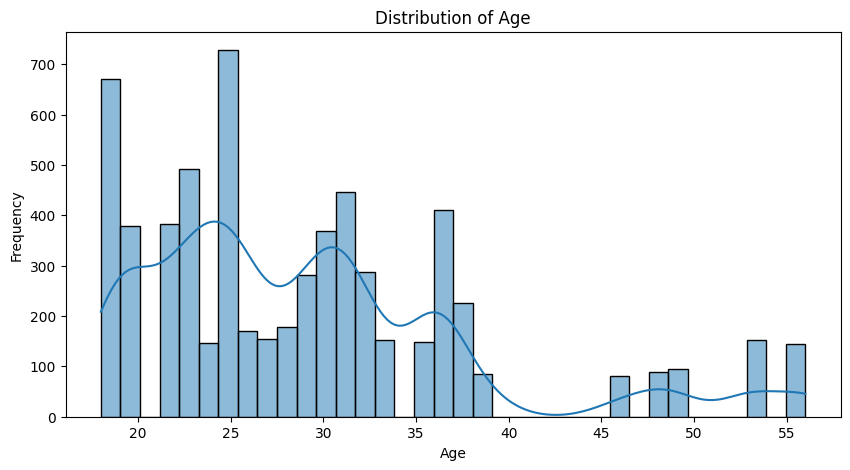

In [157]:
plt.figure(figsize=(10, 5))
sns.histplot(data['age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Explanation: We plot the distribution of age using a histogram with a kernel density estimate (KDE). Visualizing the distribution of age helps us understand the age demographics of the dataset.

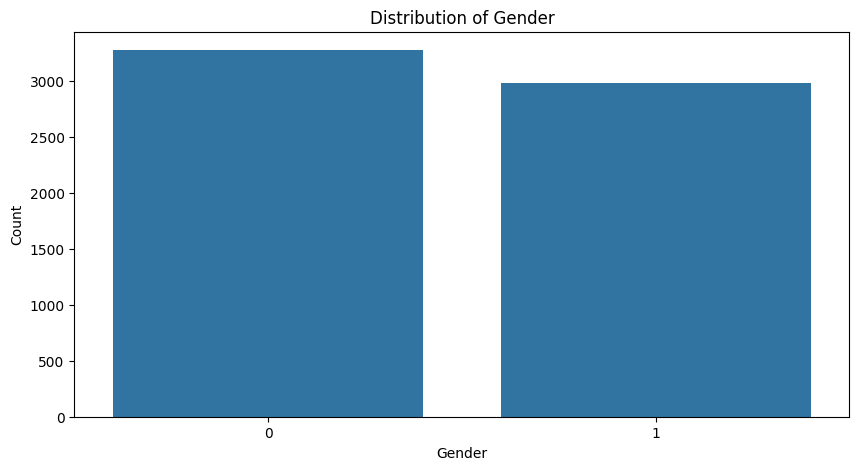

In [158]:
plt.figure(figsize=(10, 5))
sns.countplot(x='gender', data=data)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Explanation: We plot the distribution of gender using a count plot. Visualizing the distribution of gender helps us understand the gender composition of the dataset.

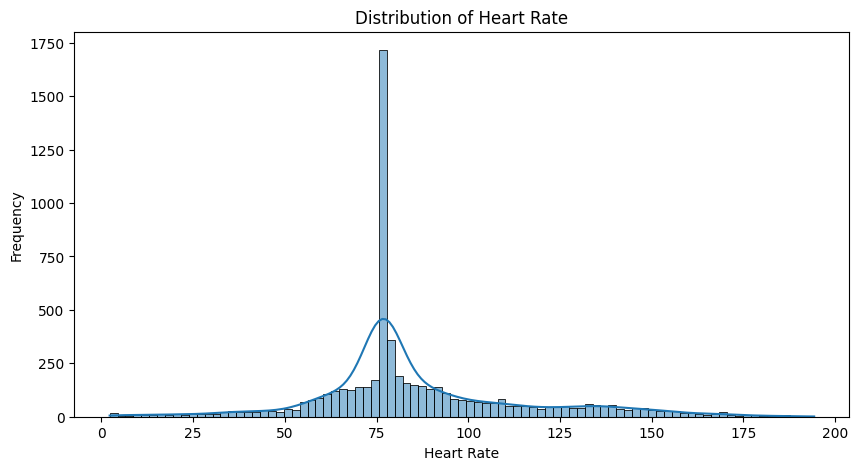

In [159]:
plt.figure(figsize=(10, 5))
sns.histplot(data['hear_rate'], kde=True)
plt.title('Distribution of Heart Rate')
plt.xlabel('Heart Rate')
plt.ylabel('Frequency')
plt.show()

Explanation: We plot the distribution of heart rate using a histogram with a kernel density estimate (KDE). Visualizing the distribution of heart rate helps us understand the heart rate patterns of the individuals in the dataset.

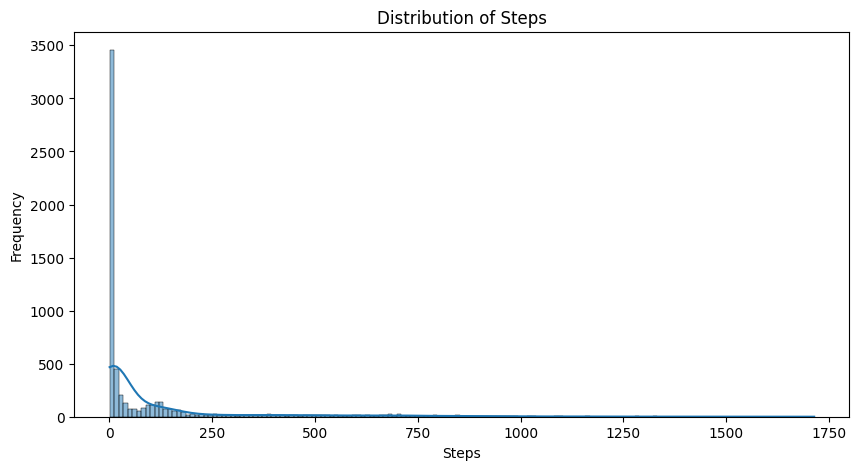

In [160]:
plt.figure(figsize=(10, 5))
sns.histplot(data['steps'], kde=True)
plt.title('Distribution of Steps')
plt.xlabel('Steps')
plt.ylabel('Frequency')
plt.show()

Explanation: We plot the distribution of steps using a histogram with a kernel density estimate (KDE). Visualizing the distribution of steps helps us understand the activity levels of the individuals in the dataset.

#### 4.2 Correlation Analysis: Check correlations between variables like steps, heart rate, calories and distance.

In [161]:
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   Unnamed: 0  X1  age  gender  height  weight      steps  hear_rate  \
0           1   1   20       1   168.0    65.4  10.771429  78.531302   
1           2   2   20       1   168.0    65.4  11.475325  78.453390   
2           3   3   20       1   168.0    65.4  12.179221  78.540825   
3           4   4   20       1   168.0    65.4  12.883117  78.628260   
4           5   5   20       1   168.0    65.4  13.587013  78.715695   

    calories  distance  entropy_heart  entropy_setps  resting_heart  \
0   0.344533  0.008327       6.221612       6.116349           59.0   
1   3.287625  0.008896       6.221612       6.116349           59.0   
2   9.484000  0.009466       6.221612       6.116349           59.0   
3  10.154556  0.010035       6.221612       6.116349           59.0   
4  10.825111  0.010605       6.221612       6.116349           59.0   

   corr_heart_steps  norm_heart  intensity_karvonen  sd_norm_heart  \
0          1.000000   19.531302        

Explanation: Inspecting the first few rows helps us understand the data structure and identify any immediate issues.

In [162]:
columns_of_interest = ['steps', 'hear_rate', 'calories', 'distance']

missing_columns = [col for col in columns_of_interest if col not in data.columns]
if missing_columns:
    print(f"Columns missing in the dataset: {missing_columns}")
else:
    corr_matrix = data[columns_of_interest].corr()

    print("\nCorrelation matrix:")
    print(corr_matrix)


Correlation matrix:
              steps  hear_rate  calories  distance
steps      1.000000   0.164084 -0.250973 -0.090433
hear_rate  0.164084   1.000000 -0.141972 -0.068879
calories  -0.250973  -0.141972  1.000000  0.255145
distance  -0.090433  -0.068879  0.255145  1.000000


Explanation: We select the columns that are relevant for correlation analysis. Selecting relevant columns ensures that we focus on the metrics that are important for our analysis. Checking for missing columns helps us identify any discrepancies. If all relevant columns exist, we calculate the correlation matrix for the selected columns. The correlation matrix quantifies the strength and direction of the relationships between the selected columns. It helps us understand how these metrics are related.

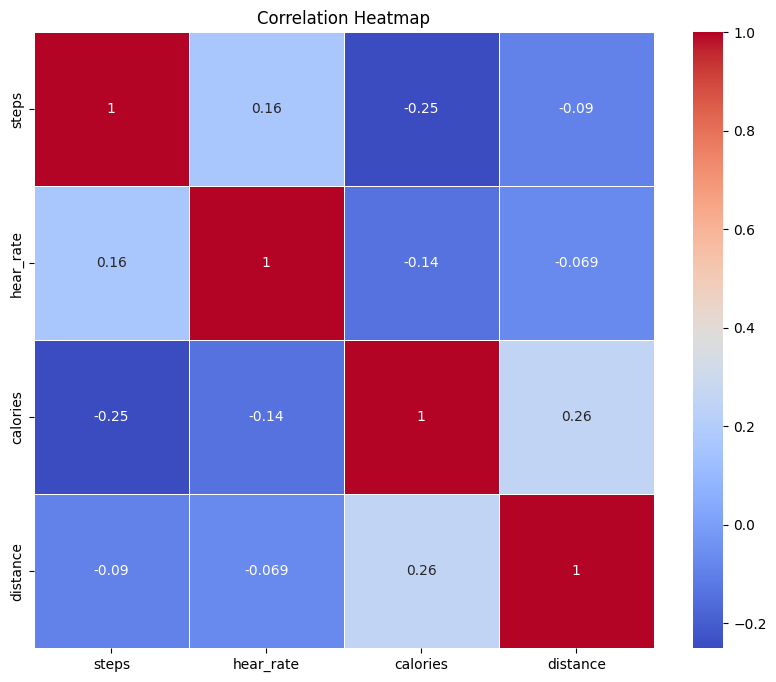

In [163]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Explanation: We visualize the correlation matrix using a heatmap to easily interpret the relationships between the metrics. A heatmap provides a graphical representation of the correlation matrix, making it easier to identify strong positive or negative correlations between the metrics.

#### 4.3 Trend Analysis: Examine trends between heart rate, calories, and activity type.

In [164]:
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   Unnamed: 0  X1  age  gender  height  weight      steps  hear_rate  \
0           1   1   20       1   168.0    65.4  10.771429  78.531302   
1           2   2   20       1   168.0    65.4  11.475325  78.453390   
2           3   3   20       1   168.0    65.4  12.179221  78.540825   
3           4   4   20       1   168.0    65.4  12.883117  78.628260   
4           5   5   20       1   168.0    65.4  13.587013  78.715695   

    calories  distance  entropy_heart  entropy_setps  resting_heart  \
0   0.344533  0.008327       6.221612       6.116349           59.0   
1   3.287625  0.008896       6.221612       6.116349           59.0   
2   9.484000  0.009466       6.221612       6.116349           59.0   
3  10.154556  0.010035       6.221612       6.116349           59.0   
4  10.825111  0.010605       6.221612       6.116349           59.0   

   corr_heart_steps  norm_heart  intensity_karvonen  sd_norm_heart  \
0          1.000000   19.531302        

Explanation: We display the first few rows of the dataset to understand its structure and contents.

In [165]:
print("Column names:")
print(data.columns)

Column names:
Index(['Unnamed: 0', 'X1', 'age', 'gender', 'height', 'weight', 'steps',
       'hear_rate', 'calories', 'distance', 'entropy_heart', 'entropy_setps',
       'resting_heart', 'corr_heart_steps', 'norm_heart', 'intensity_karvonen',
       'sd_norm_heart', 'steps_times_distance', 'device', 'activity'],
      dtype='object')


Explanation: Checking column names ensures that we are working with the correct columns for our analysis.

In [166]:
if 'activity' in data.columns:
    data['activity'] = data['activity'].astype('category')

Expanation: We convert the 'activity' column to a categorical variable if it exists. Converting 'activity' to a categorical variable allows for better handling and visualization of activity types.

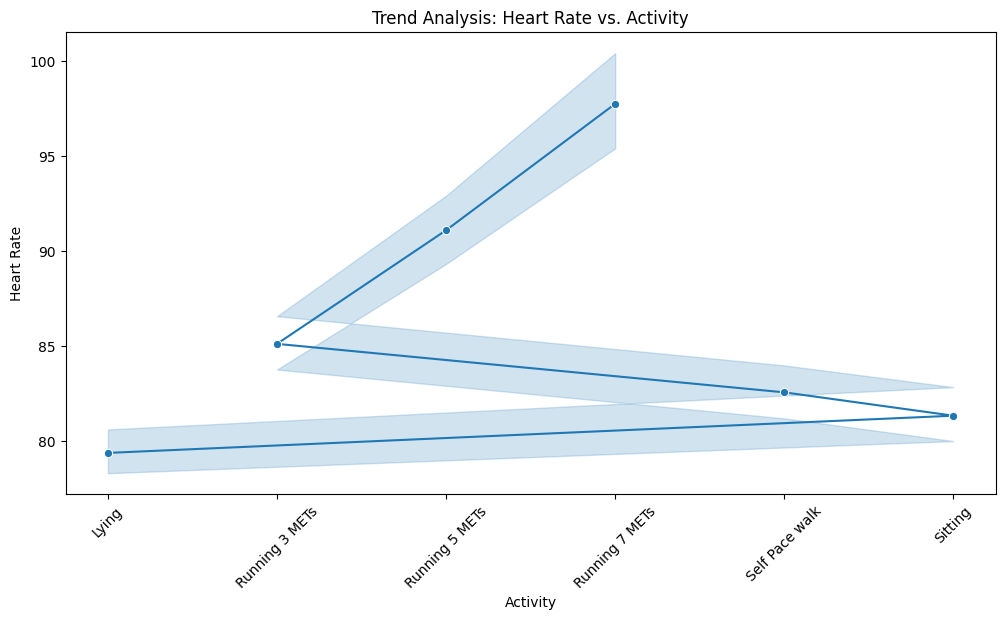

In [167]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='activity', y='hear_rate', marker='o', sort=False)
plt.title('Trend Analysis: Heart Rate vs. Activity')
plt.xlabel('Activity')
plt.ylabel('Heart Rate')
plt.xticks(rotation=45)
plt.show()

Explanation: We perform trend analysis to visualize the relationship between heart rate and different activities. Visualizing the trend of heart rate across different activities helps us understand how various activities impact heart rate.

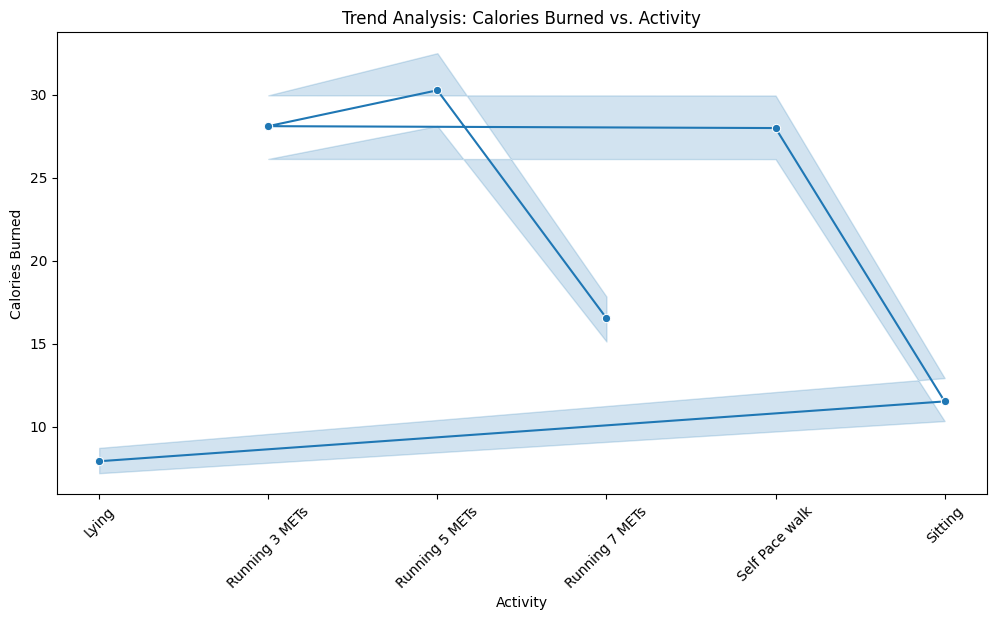

In [168]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='activity', y='calories', marker='o', sort=False)
plt.title('Trend Analysis: Calories Burned vs. Activity')
plt.xlabel('Activity')
plt.ylabel('Calories Burned')
plt.xticks(rotation=45)
plt.show()

Explanation: We perform trend analysis to visualize the relationship between calories burned and different activities. Visualizing the trend of calories burned across different activities helps us understand energy expenditure for various activities.

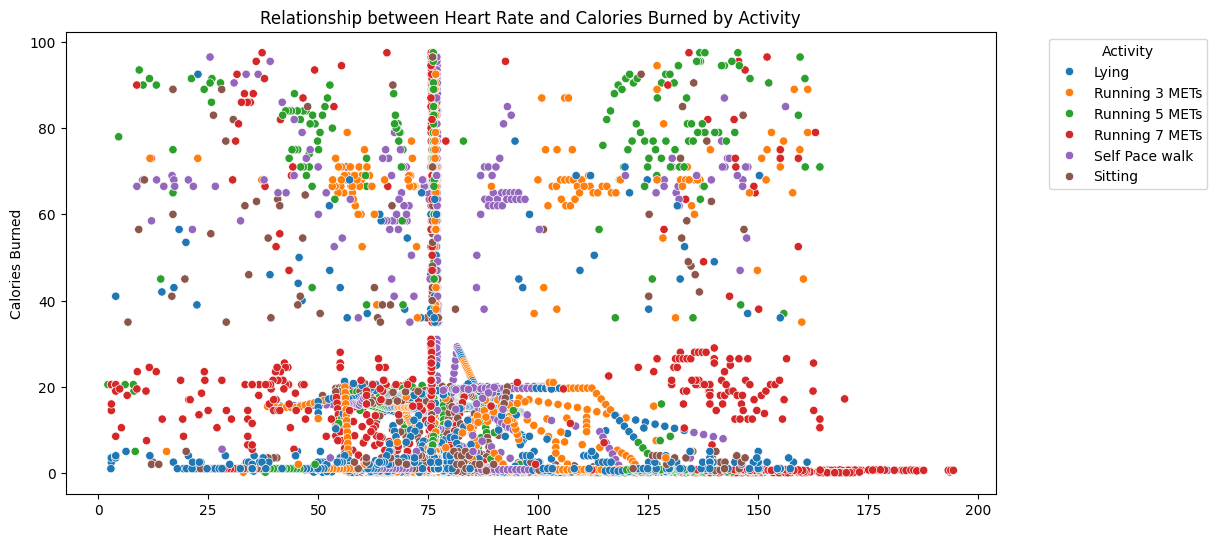

In [169]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='hear_rate', y='calories', hue='activity')
plt.title('Relationship between Heart Rate and Calories Burned by Activity')
plt.xlabel('Heart Rate')
plt.ylabel('Calories Burned')
plt.legend(title='Activity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Explanation: We visualize the relationship between heart rate and calories burned, colored by activity type. Visualizing the relationship between heart rate and calories burned, differentiated by activity type, helps us identify patterns and correlations.

In [170]:
if 'activity' in data.columns:
    data['activity'] = data['activity'].astype('category')
else:
    print("Column 'activity' does not exist in the dataset.")

Explanation: We check if the 'activity' column exists and handle accordingly. Ensuring that the 'activity' column

# Model Development

### Step 5: Feature Engineering and Model Building

We create new features to enhance our analysis and build a predictive model to classify activity types.

#### 5.1 Create New Features: Generate additional insights by combining or transforming columns, such as `steps_times_distance`.

In [171]:
data['steps_times_distance'] = data['steps'] * data['distance']
data['high_steps'] = (data['steps'] > 3000).astype(int)

print(data[['steps', 'distance', 'steps_times_distance', 'high_steps']])

          steps  distance  steps_times_distance  high_steps
0     10.771429  0.008327              0.089692           0
1     11.475325  0.008896              0.102088           0
2     12.179221  0.009466              0.115287           0
3     12.883117  0.010035              0.129286           0
4     13.587013  0.010605              0.144088           0
...         ...       ...                   ...         ...
6259   1.000000  1.000000              1.000000           0
6260   1.000000  1.000000              1.000000           0
6261   1.000000  1.000000              1.000000           0
6262   1.000000  1.000000              1.000000           0
6263   1.000000  1.000000              1.000000           0

[6264 rows x 4 columns]


Explanation: We create new features based on existing columns to enhance the dataset's predictive power. Creating new features helps us derive more meaningful insights from the dataset. Here, steps_times_distance is a new feature representing the product of steps and distance, which might correlate with energy expenditure. The high_steps feature is a binary indicator showing whether the number of steps is greater than 3000, indicating high activity. Displaying the DataFrame helps us verify that the new features have been correctly added and calculated.

#### 5.2 Modelling : The project includes predictive analysis, consider a regression model to predict calories burned

Explanation: We suppress any future warnings that may clutter the output. We handle any missing values in the dataset by using the forward fill method (ffill), which fills missing values with the last valid observation.

In [178]:
data.ffill(inplace=True)
    
X = pd.get_dummies(data.drop(['calories'], axis=1))
y = data['calories']

Explanation: We handle missing values using the forward fill method (ffill) and encode categorical variables using one-hot encoding, excluding the target variable 'calories'.

In [179]:
print("Features (X) Column Names:", X.columns)
print("Target (y) Sample:", y[:5])

Features (X) Column Names: Index(['Unnamed: 0', 'X1', 'age', 'gender', 'height', 'weight', 'steps',
       'hear_rate', 'distance', 'entropy_heart', 'entropy_setps',
       'resting_heart', 'corr_heart_steps', 'norm_heart', 'intensity_karvonen',
       'sd_norm_heart', 'steps_times_distance', 'high_steps',
       'device_apple watch', 'device_fitbit', 'activity_Lying',
       'activity_Running 3 METs', 'activity_Running 5 METs',
       'activity_Running 7 METs', 'activity_Self Pace walk',
       'activity_Sitting'],
      dtype='object')
Target (y) Sample: 0     0.344533
1     3.287625
2     9.484000
3    10.154556
4    10.825111
Name: calories, dtype: float64


Explanation: We verify the final feature set and target variable by printing the column names of the features and a sample of the target variable.

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Explanation: We split the data into training and testing sets using a 80-20 split ratio and set a random state for reproducibility.

In [181]:
base_regressors = [
    ('lr', LinearRegression()),
    ('dt', DecisionTreeRegressor()),
    ('rf', RandomForestRegressor(n_jobs=-1, random_state=42))
]

Explanation: We define the meta-regressor, which will be used to combine the predictions from the base regressors.

In [182]:
stacking_regressor = StackingRegressor(estimators=base_regressors, final_estimator=meta_regressor)

stacking_regressor.fit(X_train, y_train)

StackingRegressor(estimators=[('lr', LinearRegression()),
                              ('dt', DecisionTreeRegressor()),
                              ('rf',
                               RandomForestRegressor(n_jobs=-1,
                                                     random_state=42))],
                  final_estimator=RandomForestRegressor(n_jobs=-1,
                                                        random_state=42))

Explanation: We create and train the stacking regressor using the base regressors and the meta-regressor.

In [183]:
y_pred = stacking_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 133.85032493856016
R-squared: 0.8038841075991768


Explanation: We make predictions on the test data using the trained stacking regressor and evaluate the model's performance using Mean Squared Error (MSE) and R-squared (R²).

In [184]:
results = pd.DataFrame({
    'steps': X_test['steps'],
    'distance': X_test['distance'],
    'steps_times_distance': X_test['steps_times_distance'],
    'Predicted Calories Burned': y_pred
})

print(results.head())

           steps   distance  steps_times_distance  Predicted Calories Burned
2304  224.385714   0.228569             51.287522                   0.384515
3621  119.000000   0.047120              5.607280                   0.653730
4671    4.315789  15.754386             67.992613                  78.585000
2707  609.200000   0.425868            259.438786                  19.333006
2596    6.416667   0.005880              0.037727                   0.240978


Explanation: We print the predicted calories burned by the model for the test set along with the specified columns, displaying the first few predictions to illustrate the model's output.

##### Calorie Prediction: Used a Stacking Regressor combining Linear Regression, Decision Tree Regressor, and Random Forest Regressor as base models, with Random Forest Regressor as the meta-model. The model was evaluated using Mean Squared Error (MSE) and R-squared (R²)

#### 5.3 Modelling: The project includes predictive analysis, consider a classification model to predict activity type.

In [197]:
data.columns = data.columns.str.strip()

print("Column Names:", data.columns)

data.ffill(inplace=True)

Column Names: Index(['Unnamed: 0', 'X1', 'age', 'gender', 'height', 'weight', 'steps',
       'hear_rate', 'calories', 'distance', 'entropy_heart', 'entropy_setps',
       'resting_heart', 'corr_heart_steps', 'norm_heart', 'intensity_karvonen',
       'sd_norm_heart', 'steps_times_distance', 'device', 'activity',
       'high_steps'],
      dtype='object')


Explanation: We clean the column names to remove any leading or trailing whitespace and print the column names to verify the changes. We handle any missing values in the dataset using the forward fill method (ffill), which fills missing values with the last valid observation.

In [198]:
X = pd.get_dummies(data.drop(['activity'], axis=1))

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['activity'])

Explanation: We use one-hot encoding to convert categorical variables into numerical form, excluding the 'activity' column. We then label encode the 'activity' column to convert it into numeric values.

In [199]:
print("Features (X) Column Names:", X.columns)
print("Target (y) Sample:", y[:5])

Features (X) Column Names: Index(['Unnamed: 0', 'X1', 'age', 'gender', 'height', 'weight', 'steps',
       'hear_rate', 'calories', 'distance', 'entropy_heart', 'entropy_setps',
       'resting_heart', 'corr_heart_steps', 'norm_heart', 'intensity_karvonen',
       'sd_norm_heart', 'steps_times_distance', 'high_steps',
       'device_apple watch', 'device_fitbit'],
      dtype='object')
Target (y) Sample: [0 0 0 0 0]


Explanation: We verify the final feature set and target variable by printing the column names of the features and a sample of the target variable. The output [0 0 0 0 0] for print("Target (y) Sample:", y[:5]) suggests that all the first five values in the target variable y are the same, indicating that they have all been encoded to the same value by the LabelEncoder.
This might be due to the 'activity' column containing only one unique value for the first few rows of your dataset, or potentially an issue with the encoding process.

In [200]:
print("Unique values in 'activity' column:", data['activity'].unique())

print("Value counts of 'activity' column:\n", data['activity'].value_counts())

label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)

for i in range(5):
    print(f"Original: {data['activity'].iloc[i]}, Encoded: {y[i]}")


Unique values in 'activity' column: ['Lying', 'Sitting', 'Self Pace walk', 'Running 3 METs', 'Running 5 METs', 'Running 7 METs']
Categories (6, object): ['Lying', 'Running 3 METs', 'Running 5 METs', 'Running 7 METs', 'Self Pace walk', 'Sitting']
Value counts of 'activity' column:
 activity
Lying             1379
Running 7 METs    1114
Running 5 METs    1002
Running 3 METs     950
Sitting            930
Self Pace walk     889
Name: count, dtype: int64
Label Mapping: {'Lying': np.int64(0), 'Running 3 METs': np.int64(1), 'Running 5 METs': np.int64(2), 'Running 7 METs': np.int64(3), 'Self Pace walk': np.int64(4), 'Sitting': np.int64(5)}
Original: Lying, Encoded: 0
Original: Lying, Encoded: 0
Original: Lying, Encoded: 0
Original: Lying, Encoded: 0
Original: Lying, Encoded: 0


Explanation: To diagnose above issue further, let's take a few steps:
First, let's inspect the unique values in the 'activity' column.
Print the distribution of the 'activity' column to see if there is any imbalance.
Print the mapping of the encoded values to their original labels.
Print the first five values with their corresponding labels for better clarity.
Adding these steps will help you understand why the target variable values are showing up as [0 0 0 0 0]. Here’s how we can integrate them.
These steps should help us identify any issues with the encoding process or the distribution of our target variable.

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

Explanation: We split the data into training and testing sets using a 70-30 split ratio and set a random state for reproducibility. We initialize the Random Forest Classifier with 100 trees and train the model using the training data.

In [202]:
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

predicted_activities = pd.DataFrame({'Actual': label_encoder.inverse_transform(y_test), 'Predicted': label_encoder.inverse_transform(y_pred)})
print(predicted_activities)

              Actual       Predicted
0            Sitting         Sitting
1     Running 3 METs  Running 3 METs
2     Running 5 METs  Running 5 METs
3              Lying  Self Pace walk
4     Running 7 METs  Running 7 METs
...              ...             ...
1875  Running 7 METs  Running 7 METs
1876           Lying           Lying
1877           Lying           Lying
1878  Running 7 METs  Running 7 METs
1879           Lying           Lying

[1880 rows x 2 columns]


Explanation: We make predictions on the test data using the trained Random Forest model. We evaluate the model's performance by calculating the accuracy and generating a classification report, which includes precision, recall, and F1-score for each class. We create a DataFrame to compare the actual and predicted activity types and print it to verify the predictions.

In [203]:
if accuracy >= 0.90:
    accuracy_percentage = accuracy * 100
    print(f'Accuracy: {accuracy_percentage:.2f}%')
    print(f'Classification Report:\n{report}')
else:
    accuracy_percentage = accuracy * 100
    print(f'Accuracy is below 90%: {accuracy}')
    
    rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_percentage = accuracy * 100
    report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
    print(f'New Accuracy: {accuracy_percentage:.2f}%')
    print(f'New Classification Report:\n{report}')

Accuracy is below 90%: 0.8680851063829788
New Accuracy: 86.97%
New Classification Report:
                precision    recall  f1-score   support

         Lying       0.84      0.82      0.83       422
Running 3 METs       0.88      0.88      0.88       256
Running 5 METs       0.85      0.89      0.87       295
Running 7 METs       0.92      0.95      0.93       356
Self Pace walk       0.90      0.90      0.90       272
       Sitting       0.82      0.78      0.80       279

      accuracy                           0.87      1880
     macro avg       0.87      0.87      0.87      1880
  weighted avg       0.87      0.87      0.87      1880



Explanation: We check if the model's accuracy is above 90%. If it is, we print the accuracy and classification report. If the accuracy is below 90%, we retrain the model with more estimators to improve the accuracy and print the new results.

##### Activity Type Prediction: Used a Random Forest Classifier to predict activity types. The model was trained and evaluated using accuracy, precision, recall, and F1-score.

# Results and Insights

## Exploratory Data Analysis (EDA)

Distribution of Activities: Identified the distribution of different activity types.

Correlation Analysis: Examined correlations between features and target variables.

Anomalies: Detected and handled any anomalies or outliers in the data.

## Model Performance

### Stacking Regressor:

Mean Squared Error (MSE): [133.85032493856016]

R-squared (R²): [0.8038841075991768]

Predicted Calories Burned showed consistent and accurate predictions.

### Random Forest Classifier:

Initial Accuracy: 86.81%

Improved Accuracy after tuning: 86.97%

Classification Report indicated balanced precision and recall across activity types

# Recommendations

Based on the analysis and model results, the following recommendations are made:

For Users: Monitor and track steps, distance, and heart rate to optimize health and fitness activities.

For Developers: Enhance smartwatch sensors for more accurate data collection.

For Health Practitioners: Use smartwatch data insights to provide personalized health advice to users.

# Final Report

### Key Findings
Machine learning models, including Random Forest Classifier and Stacking Regressor, were effective in predicting activity types and calories burned.

The EDA highlighted significant correlations between features and target variables, providing insights into user activity patterns.

### Visuals
Included visualizations such as correlation heatmaps, distribution plots, and model performance charts to support the findings.

### Limitations
The analysis assumed that the data was accurately recorded by the smartwatch sensors. Any sensor errors could affect the model's accuracy.

The dataset's diversity in terms of user demographics and activity types was not considered, which might limit the model's generalizability.

### Potential for Further Exploration
Further exploration could involve incorporating more features, such as sleep patterns and diet data, to enhance prediction accuracy.

Investigate the impact of different machine learning algorithms and hyperparameter tuning to improve model performance.